In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

In [3]:
df=pd.read_csv('C:\\Users\\benec\\Downloads\\archive (8)\\Inc_Exp_Data.csv')
print(df)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

In [4]:
df=pd.get_dummies(df,columns=['Highest_Qualified_Member'],drop_first=True)
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Highest_Qualified_Member_Illiterate,Highest_Qualified_Member_Post-Graduate,Highest_Qualified_Member_Professional,Highest_Qualified_Member_Under-Graduate
0,5000,8000,3,2000,64200,1,0,0,0,1
1,6000,7000,2,3000,79920,1,1,0,0,0
2,10000,4500,2,0,112800,1,0,0,0,1
3,10000,2000,1,0,97200,1,1,0,0,0
4,12500,12000,2,3000,147000,1,0,0,0,0
5,14000,8000,2,0,196560,1,0,0,0,0
6,15000,16000,3,35000,167400,1,0,1,0,0
7,18000,20000,5,8000,216000,1,0,0,0,0
8,19000,9000,2,0,218880,1,0,0,0,1
9,20000,9000,4,0,220800,2,0,0,0,1


In [5]:
X=df[['Mthly_HH_Income','No_of_Fly_Members']]
y=df['Mthly_HH_Expense']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn_model.predict(X_test)
y_pred

array([ 5000, 20000, 12000, 25000,  5000, 25000, 12000, 25000, 12000,
       25000], dtype=int64)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 10.00%


In [12]:
h =1
x_min, x_max = X['Mthly_HH_Income'].min() - 1, X['Mthly_HH_Income'].max() + 1
y_min, y_max = X['No_of_Fly_Members'].min() - 1, X['No_of_Fly_Members'].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [13]:
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


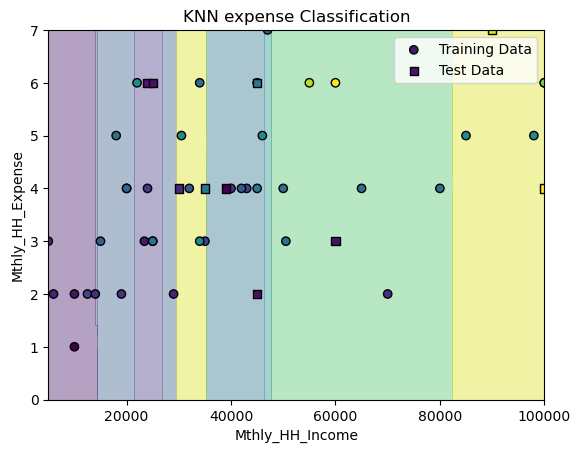

In [14]:
plt.contourf(xx, yy,Z,alpha=0.4)
plt.scatter(X_train['Mthly_HH_Income'], X_train['No_of_Fly_Members'], c=y_train, marker='o', edgecolor='k', label='Training Data')
plt.scatter(X_test['Mthly_HH_Income'], X_test['No_of_Fly_Members'], c=y_test, marker='s', edgecolor='k', label='Test Data')

plt.xlabel('Mthly_HH_Income')
plt.ylabel('Mthly_HH_Expense')
plt.title('KNN expense Classification')
plt.legend()
plt.show()